# Соединения Солнца и Астрономических Объектов

## 1. Немного о вычислениях

В астрономии используется несколько видов координат. Один из них - геоцентрические; представьте поверхность Земли с нанесённой на неё разметкой в виде меридианов и параллелей, при этом последние удаляются в бесконечность, образуя т.н. небесную сферу. С точки зрения земного наблюдателя по небесной сфере движутся все астрономические объекты. Измеряя их положение в одно и то же фикисированное время суток на протяжении времени, примерно соответствующему одному земному году, можем заметить, что астрономические объекты 

Теперь вспомним, что Земля вращается вокруг Солнца под углом. 

### Вторая экваториальная система:

Основная плоскость - плоскость небесного экватора, в случае геоцентрической координатной системы совпадает с плоскостью Земного экватора.

Координаты второй экваториальной системы - (прямое восхождение, склонение) = (Ra, Dec).

$\textbf{Ra}$ (обозначается как $\alpha$) - англ. $\textbf{right ascension}$ - прямое восхождение, дуга небесного экватора от точки весеннего равноденствия до круга склонения светила, или угол между направлением на точку весеннего равноденствия и плоскостью круга склонения светила. Является эквивалентом долготы, отсчитывается от точки весеннего равноденствия (напомним, так называют точку, где Солнце пересекает небесный экватор в весеннее время года).

$\textbf{Dec}$ (обозначается как $\delta$) - англ. $\textbf{declination}$ - склонение, равняется угловому расстоянию на небесной сфере от плоскости небесного экватора до объекта; имеет знак ($+ \delta$ для объектов выше небесного экватора (север), $- \delta$ для объектов ниже (расположенных к югу). Является эквивалентом земной широты, отсчитывается от плоскости небесного экватора (в этой же плоскости лежит земной экватор).

Обе величины могут быть записаны в одном из двух форматов: в часовом $\textbf{h:m:s}$, где $h \in [0,24)$, $m, s \in [0, 60)$ (часы:минуты:секунды), либо угловом $\bf{a^o \, b' \, c''}$ (или $\textbf{a:b:c}$), $ a \in [0, 360)$ для $\alpha$ и $a \in [-90, 90]$ для $\delta$, $b,c \in [0, 60)$ (градусы:минуты:секунды).

### Приближение времени соединения Солнца и астрономического объекта

Считаем, что объект априори образует соединение с Солнцем (т.е., окзывается в некоторой малой окрестности Солнца с точки зрения наблюдателя). Для определения времени нам потребуются Ra ($\alpha$) координата Солнца и объекта. Обозначим их как $\alpha_{Sun}$ и $\alpha_{obj}$.

Здесь важно сделать ремарку о том, в каком формате доступны координаты Солнца. Таблицы, содержащие эти координаты для заданного объекта (а также и ряд других параметров) называют $\textbf{эфемеридами}$. Эфемериды вычисляются с учётом локального положения наблюдателя на поверхности Земли. Данный скрипт использует эфемериды Александровича, доступные по ссылке: http://hea.iki.rssi.ru/~nik/ak/sun.htm . Указанные эфемериды Солнца вычислены на каждый день для часового пояса UTC +03:00 (12:00 по Московскому зимнему времени). На момент написания данного текста эфемериды доступны с 1.12.2014 по 31.01.2016.

Таким образом, в нашем распоряжении оказываются координаты Солнца, вычисленные с шагом в одни сутки. Для приближённого вычисления времени соединения можно вычислить среднюю скорость движения Солнца по Ra-координате за 24 часа:
$$v_{\text{ср}} = \frac{\alpha_{Sun}^{[1]} - \alpha_{Sun}^{[0]}}{\Delta t} = \frac{\Delta \alpha_{Sun}}{\Delta t},$$
где $\Delta t = 24$ часа, $\alpha_{Sun}^{[0]}, \, \alpha_{Sun}^{[1]}$ - соседние измерения Ra-координаты Солнца.

Далее, из предположения о том, что соединения в указанный 24-часовой промежуток (от полудня первого дня до полудня дня второго) всё-таки произойдёт, вытекает, что в некоторый момент времени Ra-координаты Солнца и объекта совпадут. Что же, тогда не составляет никакого труда вычислить длину пути по $\alpha$-координате:
$$s = \alpha_{obj} - \alpha_{Sun}^{[0]},$$
и время соединения (в приближении равномерного движения по Ra-координате!) вычисляется по простой школьной формуле путём деления длины пути на скорость движения:
$$t_{appr.} = t_0 + \frac{s}{v_{\text{ср}}},$$
где индекс "appr." является сокращением от "approximate" (приближённый), а $t_0$ - время измерения $\alpha_{Sun}^{[0]}$.

### Вычисление удалённости положения объекта от Солнечной эклиптики

Здесь тоже всё относительно просто: необходимы $\delta$-координаты Солнца в момент соединения и объекта, из координаты Солнца вычитаем координату объекта, получаем расстояние, на котором объект отстоит от Солнца по данной координате:
$$\rho(\text{Sun}, \text{obj}) = \delta_{\text{Sun}} - \delta_{\text{obj}},$$
т.к. $\alpha$-координаты в момент соединения совпадают. Координаты $\delta_{\text{obj}}$ для астрономических объектов доступны из астрономических каталогов. С Dec-координатой для Слнца приходится немного сложнее.


Существуют формулы для приближённого вычисления склонения Солнца в зависимости от дня в году и времени суток. Здесь была использована следующая формула:
$$\delta \approx \frac{\pi}{180} \arcsin\left[ \sin\left(-23.44^o \frac{\pi}{180}\right) \cos\left(\frac{2 \pi}{365.24}(N+10) + 2 \cdot 0.0167 \cdot \sin\left(\frac{2 \pi}{365.24} (N-2)\right)\right) \right]$$

Параметр N изменяется от 0 до 365(366), при этом полагается изменяющимся непрерывно. Это даёт возможность учитывать суточное время. Так, для 12 часов 1.01 числа $N=0.5$.




In [1]:
import numpy as np
from coord import coord

star_day = 60*60*24#86164.090530833 #seconds
    
def sundec(N):
    tmp = np.sin(-23.44 * np.pi / 180)
    tmp *= np.cos(2*np.pi / 365.24 * ( N + 10) + 2*0.0167*np.sin(2*np.pi / 365.24*(N-2)))
    return np.arcsin(tmp)*180/np.pi

def numdays(day, month, vis = False):
    mns = [31, 28, 31, 30, 31, 30, 31, 31, 30, 31, 30, 31]
    if vis:
        mns[1] +=1
    mns = np.array(mns)
    month -= 1
    tmp = mns[:month].sum()
    tmp += day
    return tmp - 1

def comp_time(sun1, sun2, sun3, star):
    st = star.f2s()
    s1 = sun1.f2s()
    s2 = sun2.f2s()
    s3 = sun3.f2s()
    assert (st > s1) and (s3 > st), 'Object is not in interval'
    if st < s2:
        sun = sun1
        ds = sun2 - sun1
        num = 0
    else:
        sun = sun2
        ds = sun3 - sun2
        num = 1
    point = star - sun # intersection path
    pra = point.f2s() # path in seconds
    vra = ds / star_day # velocity
    t = coord(0, 0, pra / vra)# time of intersection
    return t, num

def comp_dist(day, mon, time, obj_dec):
    N = numdays(day, mon)
    tm = time.f2s()
    N += tm / star_day
    sd = sundec(N)
    sun_dec = coord(0,0,abs(sd)*3600,np.sign(sd),'deg')
    return sun_dec - obj_dec


In [15]:
from suneph import alex_se
from utils import parse_date, parse_coord
import time
from astroquery.vizier import Vizier

day = int(time.strftime("%d"))
month = int(time.strftime("%m"))
year = int('20' + time.strftime('%y'))

records = alex_se()
sun = []
for i in xrange(len(records[0])):
    sun.append([parse_date(records[0][i]), parse_coord(records[1][i], 'ra'), parse_coord(records[2][i], 'deg')])

for ind, row in enumerate(sun):
    if [day, month, year] in row:
        break

        
ra_interest = str(sun[ind-1][1]) + '..' + str(sun[ind+1][1])
a = sun[ind-1][2]
b = sun[ind+1][2]
if a.f2s() < b.f2s():
    c = a
    d = b
else:
    c = b
    d = a
    
phi = coord(15,0,0,1,'deg')

dec_interest = str(c - phi) + '..' + str(d + phi)
print day, month,year
print "Ra  of interest:", ra_interest
print "Dec of interest:", dec_interest
print

ra_interest = ra_interest.replace(' ', '')
dec_interest = dec_interest.replace(' ', '')

Vizier.ROW_LIMIT = -1
#catalog_list = Vizier.find_catalogs('V/50')
v = Vizier(columns=['Name', 'HD', 'RAJ2000', 'DEJ2000', 'Vmag'], catalog = 'V/50')
result = v.query_constraints(catalog = 'V/50', RAJ2000 = ra_interest, DEJ2000 = dec_interest)
#result[result.keys()[0]].pprint()

numobjs = len(result[0])
twelveoc = 12*60*60
tms = twelveoc*np.array([1., 3., 4.])

print '==========' + '=' + '============' + '=' + '======' + '=' + '=========' + '=' + '====' + '=' + '============'
print 'Date      ' + ' ' + ' Time       ' + ' ' + 'HD    ' + ' ' + 'Name     ' + ' ' + 'Vmag' + ' ' + 'Dec         '
print '==========' + '=' + '============' + '=' + '======' + '=' + '=========' + '=' + '====' + '=' + '============'
for i in xrange(numobjs):
    [name, hd, ra, dec, vmag, _, _] = result[0][i]
    ra = parse_coord( ra, 'ra', ' ')
    dec = parse_coord( dec, 'deg', ' ')
    t, num = comp_time(sun[ind-1][1], sun[ind][1], sun[ind+1][1], ra)
    t = t.f2s()
    
    if num > 0:
        t += 2*twelveoc
    tmp = tms - t
    sz = tmp[tmp > 0].size
    if sz == 1:
        idx = ind+1
    elif sz == 2:
        idx = ind
    elif sz == 3:
        idx = ind-1
    t = coord(0, 0, t + twelveoc, 1, 'ra')
    if idx == ind:
        curdate = sun[idx][0]
        if name == '':
            name = '         '
        dist = comp_dist(curdate[0], curdate[1], t, dec)
        tmp = str(curdate[0])
        if len(tmp) <  2:
            tmp = ' ' + tmp
        date = '' + tmp + '/'
        tmp = str(curdate[1])
        if len(tmp) < 2:
            tmp = ' ' + tmp
        date = date + tmp + '/' + str(curdate[2])
        print date, t, hd, name, vmag, dist

6 10 2015
Ra  of interest:  12:42:38.06.. 12:49:55.54
Dec of interest: -20:21: 8.5 ..+10:24:57.3 

Date        Time        HD     Name      Vmag Dec         
 6/10/2015   7:39:43.64 110951 32    Vir 5.22 -12:31:23.01
 6/10/2015  12:38:48.31 111028 33    Vir 5.67 -14:28:10.82
 6/10/2015  17: 0:34.53 111133           6.34 -10:57: 1.59
 6/10/2015  20:25: 7.48 111199           6.26 + 1:14:51.76
 6/10/2015  22:23:30.8  111239 35    Vir 6.41 - 8:39:31.02


## График функции приближённого вычисления склонения Солнца

[Nmin, Nmax] - отрезок числа дней, для которых будет построен график.

step - шаг по времени. По умолчанию выбрали в один час [step = 1 / 24]

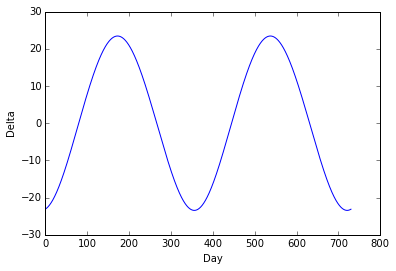

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np

Nmin = 0
Nmax = 365*2
step = 1. / 24.

def sundec(N):
    tmp = np.sin(-23.44 * np.pi / 180)
    tmp *= np.cos(2*np.pi / 365.24 * ( N + 10) + 2*0.0167*np.sin(2*np.pi / 365.24*(N-2)))
    return np.arcsin(tmp)*180/np.pi

N = np.arange(Nmin, Nmax, step)
f = sundec(N)

plt.plot(N, f)
plt.xlabel('Day')
plt.ylabel('Delta')